# Gradient Boosting 
- 딥러닝에서 Gradient랑 Gradient Boosting에서 Gradient는 둘다 최적화를 뜻한다.
- 여러 개의 약한 학습기 (결정 트리) 순차적으로 학습 -> 잘못 예측한 오차(잔차)를 줄여나가는 방식으로 모델 개선

Gradient Boosting은 여러 개의 약한 학습기(weak learner)를 순차적으로 학습시켜 강한 예측 모델을 만드는 앙상블 기법 중 하나입니다.   
주로 결정 트리(Decision Tree)를 약한 학습기로 사용하며, 각 단계에서 이전 모델의 오차를 보완하도록 설계된 새로운 모델을 추가합니다. 이러한 과정은 모델이 점점 개선되도록 하여 최종적으로 강력한 예측 모델을 형성합니다.  

Gradient Boosting의 핵심 아이디어는 이전 모델의 예측 결과에서 발생한 **잔차(residual)**, 즉 오차를 줄이는 방식으로 새로운 모델을 학습하는 것입니다. 구체적으로, 각 반복 단계에서 다음과 같은 절차가 이루어집니다.

1. **초기 모델 생성**: 데이터를 사용하여 간단한 모델을 학습합니다. 보통은 평균값으로 예측하는 방식이 초기 모델이 됩니다.  
2. **잔차 계산**: 현재까지의 모델이 예측한 값과 실제 값 사이의 오차를 계산하여 잔차를 구합니다.
3. **잔차를 예측하는 새로운 모델 학습**: 이 잔차를 예측하기 위해 새로운 모델을 학습시킵니다.   새로운 모델은 이전 모델의 예측 오차를 줄이는 방향으로 학습됩니다.  
4. **모델 업데이트**: 현재까지의 모델에 새로운 모델을 가중치를 곱해 더하여 업데이트합니다. 이렇게 하면 모델이 잔차를 점점 줄여나가는 방향으로 발전합니다.  
5. **반복**: 잔차가 더 이상 줄어들지 않을 때까지 위 과정을 반복합니다.  

In [1]:
# 라이브러리 임포트 
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing #
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve # 분리, 검증, 학습 곡선
from sklearn.preprocessing import StandardScaler # scaler
from sklearn.ensemble import GradientBoostingRegressor # Gradient boosting regressor
from sklearn.metrics import mean_squared_error, r2_score # MSE, R2
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 로드 및 전처리
data = fetch_california_housing()
X , y = data.data , data.target # feature, target 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 훈련, 검증 데이터로 분리

In [6]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [7]:
# 스케일링
scaler = StandardScaler()
X_trained_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Gradient Boosting 모델 생성 및 학습
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_trained_scaled, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
# 모델 예측
y_pred = gb.predict(X_test_scaled)

In [10]:
# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Squared Error: 0.29
R2 Score: 0.78


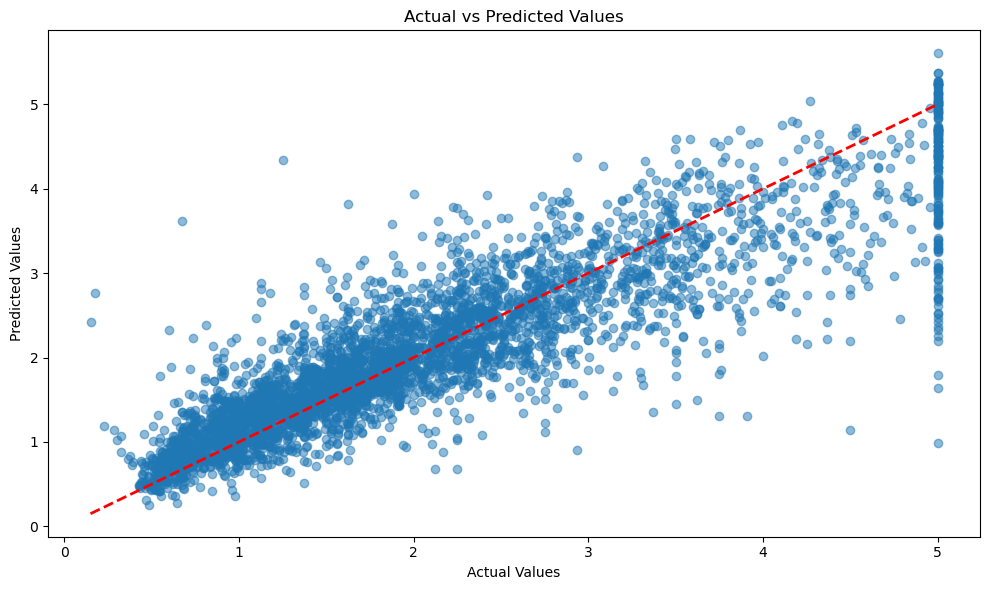

In [11]:
# 실제값과 예측값 비교 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.tight_layout()
plt.show()

In [12]:
# 특성 중요도 시각화
feature_importance = gb.feature_importances_
feature_names = data.feature_names

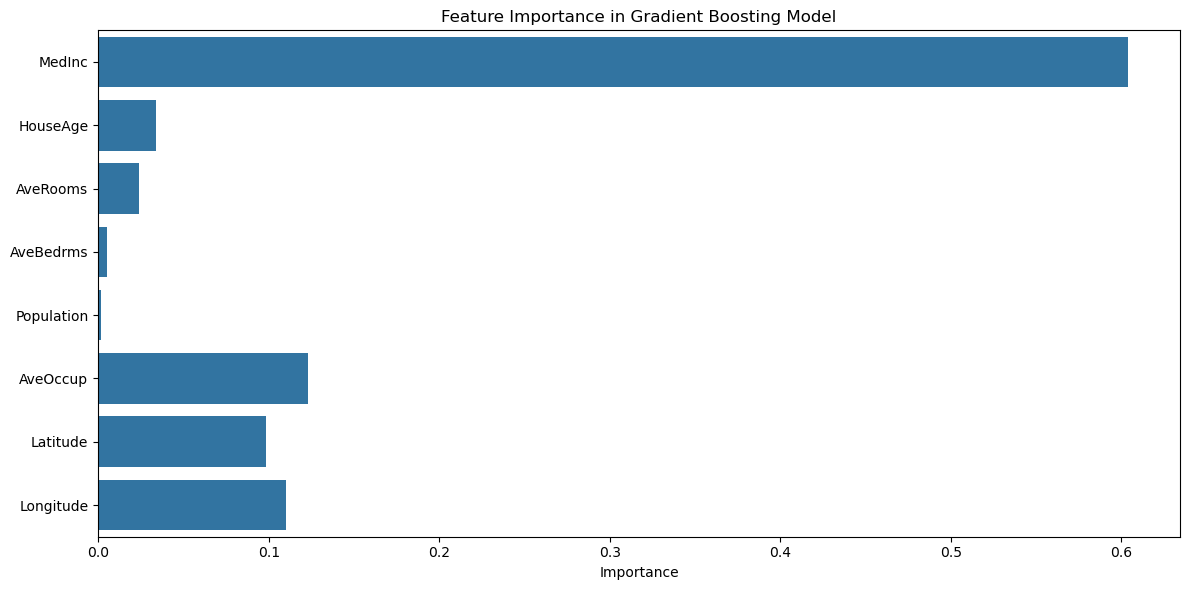

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance, y=feature_names)
plt.title('Feature Importance in Gradient Boosting Model')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

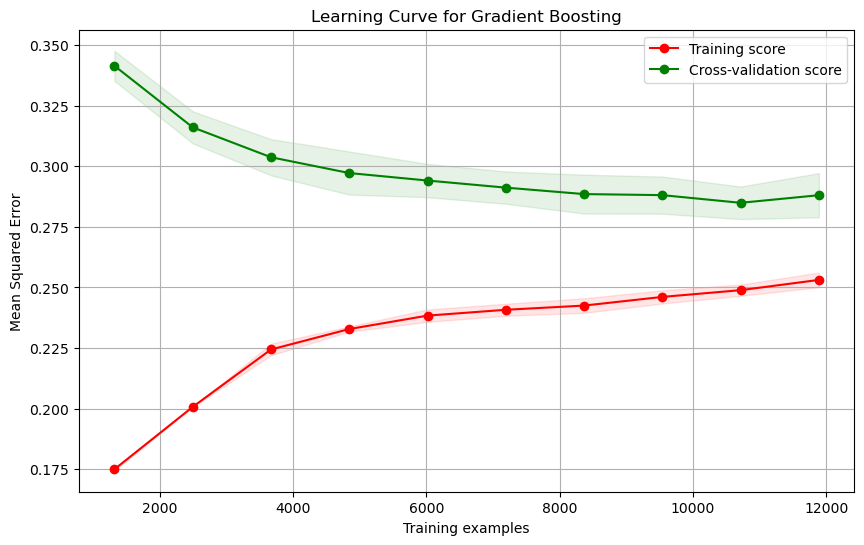

In [14]:
# 학습 곡선
train_sizes, train_scores, test_scores = learning_curve(
    gb, X_trained_scaled, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 0.9, 10), scoring='neg_mean_squared_error'
)

train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.xlabel("Training examples")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve for Gradient Boosting")
plt.legend(loc="best")
plt.grid()
plt.show()

In [15]:
# 교차  -  모델의 일반화 성능을 평가
cv_scores = cross_val_score(gb, X_trained_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores = - cv_scores  # MSE를 양수로 변환

In [16]:

print("\nCross-validation scores (MSE):", cv_scores)
print("Mean CV score (MSE):", cv_scores.mean())
print("Standard deviation of CV scores:", cv_scores.std())


Cross-validation scores (MSE): [0.29229815 0.27575935 0.27995875 0.28218075 0.29590077]
Mean CV score (MSE): 0.28521955409998084
Standard deviation of CV scores: 0.00762365664963387


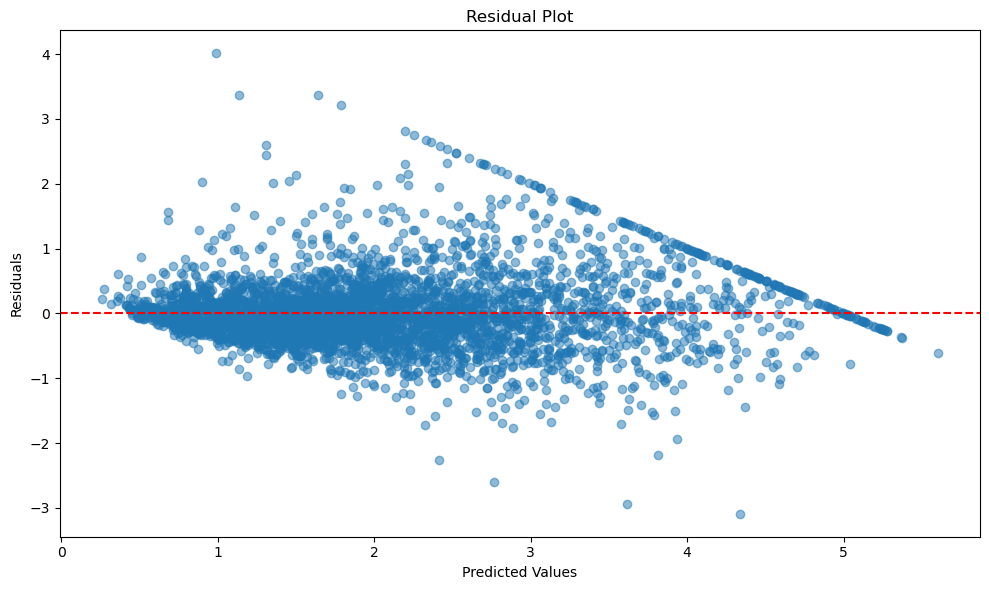

In [17]:
# 잔차 플롯
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

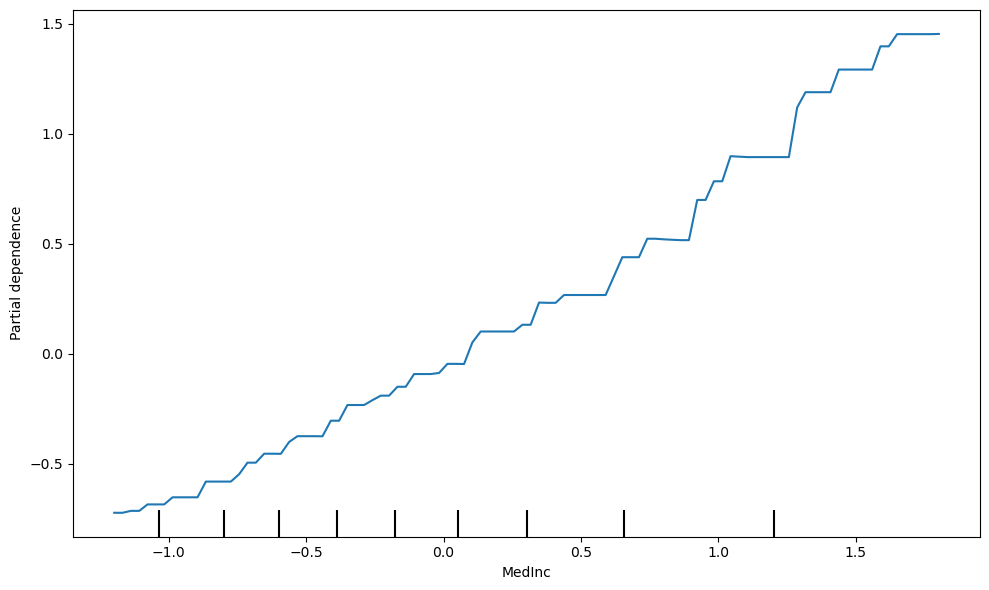

In [18]:
# 부분 의존성 플롯
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(gb, X_trained_scaled, [0], ax=ax, feature_names=data.feature_names)
plt.tight_layout()
plt.show()